# Part 1: Data gathering and importing required modules

In [69]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [70]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv("C:/Users/Asus/Downloads/Employee data.csv", index_col=None)

In [71]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Part 2: Data Preprocessing

In [72]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [73]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3: Exploring the Data


## 3a. Statistical Overview

The dataset has:

* About 15,000 employee observations and 10 features

* The company had a turnover rate of about 24%

* Mean satisfaction of employees is 0.61

In [74]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [75]:
# Check the type of our features. 
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [76]:
# about 76% of employees stayed and 24% of employees left. 

turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate


0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [77]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [78]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 3b. Correlation Matrix & Heatmap

### Moderate Positively Correlated Features:

* projectCount vs evaluation: 0.349333
* projectCount vs averageMonthlyHours: 0.417211
* averageMonthlyHours vs evaluation: 0.339742
    
### Moderate Negatively Correlated Feature:

* satisfaction vs turnover: -0.388375

### Summary:

From the heatmap, there is a **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. We are assuming that people tend to leave a company more when they are less satisfied.

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


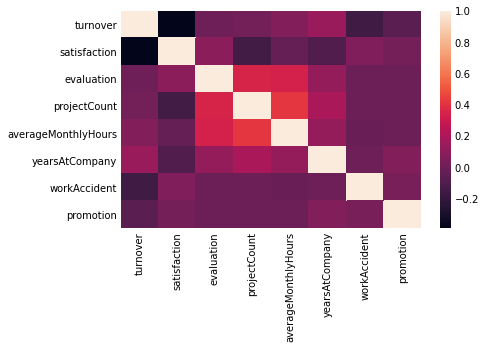

In [79]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [80]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
#emp_population = df['satisfaction'].mean()
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


## 3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)

**Summary:** Let's examine the distribution on some of the employee's features. Here's what we found:

* **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
* **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
* **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
* The evaluation and average monthly hour graphs both share a similar distribution.
* Employees with lower average monthly hours were evaluated less and vice versa.
* If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

Text(0, 0.5, 'Employee Count')

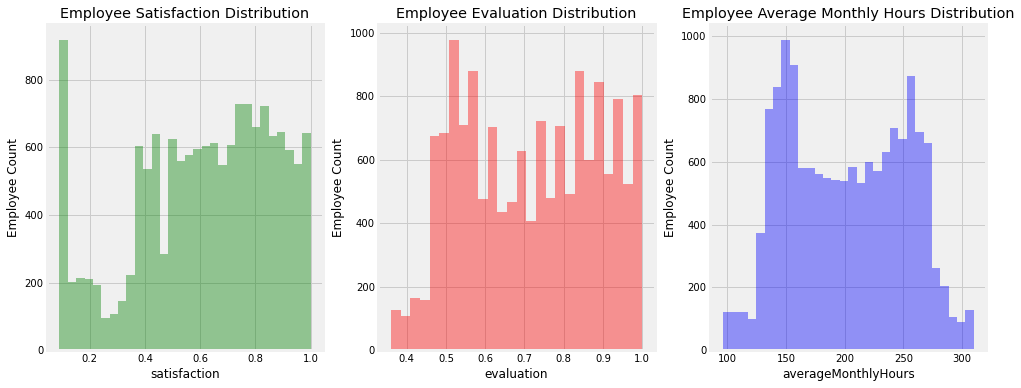

In [81]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

## 3d. Salary V.S. Turnover

**Summary:** This is not unusual. Here's what I found:

* Majority of employees who left either had **low** or **medium** salary.
* Barely any employees left with **high** salary
* Employees with low to average salaries tend to leave the company.

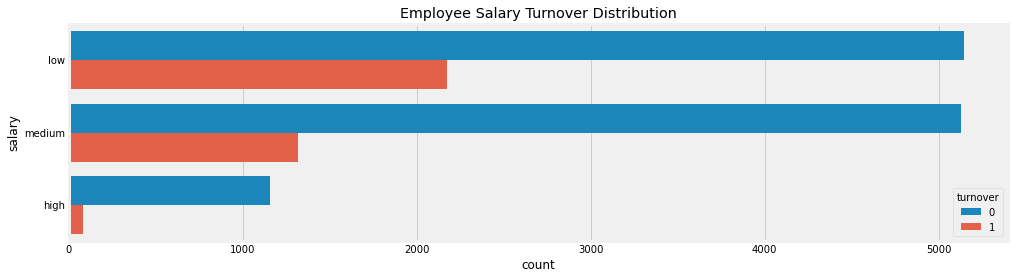

In [82]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

## 3e. Department V.S. Turnover

**Summary:** Let's see more information about the departments. Here's what I found:

* The **sales, technical, and support department** were the top 3 departments to have employee turnover
* The management department had the smallest amount of turnover

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

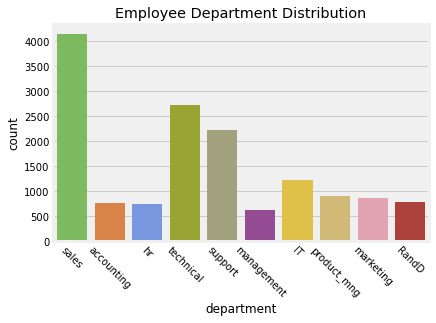

In [83]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

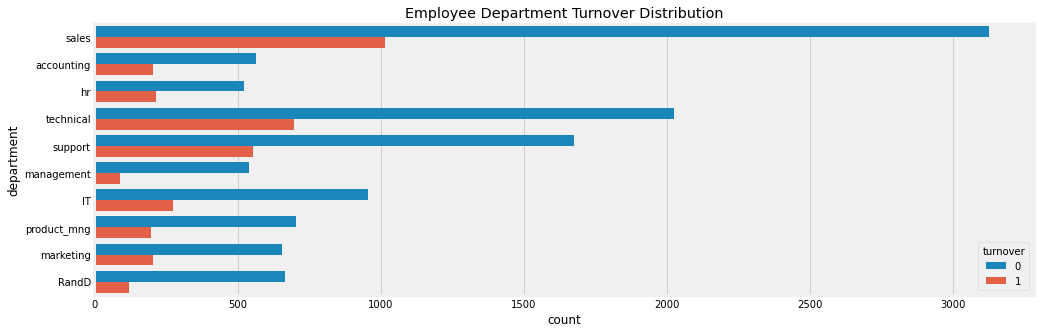

In [84]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

## 3f. Turnover V.S. ProjectCount

**Summary:** This graph is quite interesting as well. Here's what I found:

* More than half of the employees with **2,6, and 7** projects left the company
* Majority of the employees who did not leave the company had **3,4, and 5** projects
* All of the employees with **7** projects left the company
* There is an increase in employee turnover rate as project count increases

[Text(0, 0.5, 'Percent')]

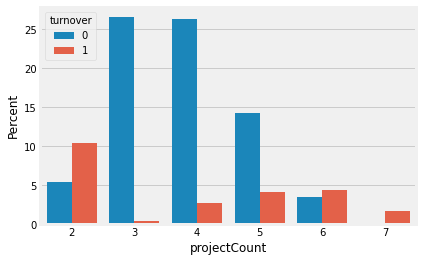

In [85]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## 3h. Turnover V.S. AverageMonthlyHours

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

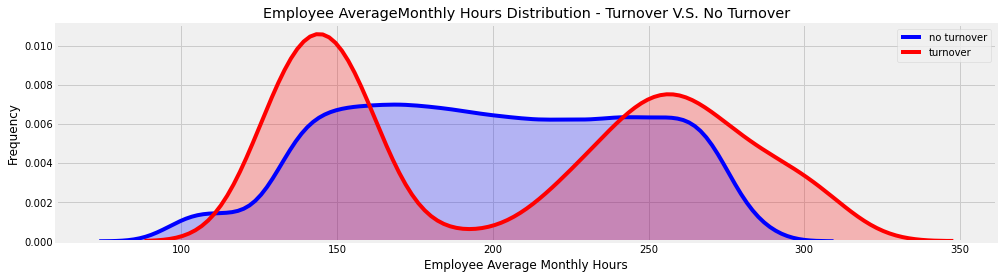

In [86]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

**Summary:**

* Another bi-modal distribution for employees that turnovered
* Employees who had less hours of work **(~150hours or less)** left the company more
* Employees who had too many hours of work **(~250 or more)** left the company
* Employees who left generally were **underworked** or **overworked.**

## 3i. Turnover V.S. Satisfaction

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

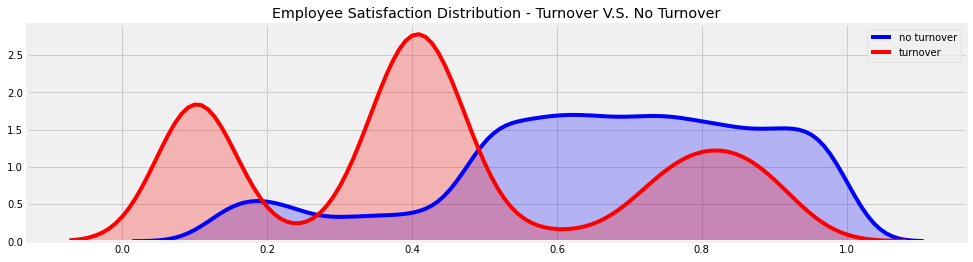

In [87]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

**Summary:**

* There is a **tri-modal** distribution for employees that turnovered
* Employees who had really low satisfaction levels **(0.2 or less)** left the company more
* Employees who had low satisfaction levels **(0.3~0.5)** left the company more
* Employees who had really high satisfaction levels **(0.7 or more)** left the company more

## 3j. ProjectCount VS AverageMonthlyHours

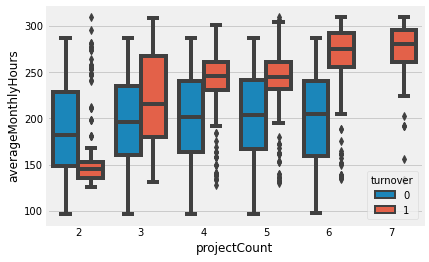

In [88]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

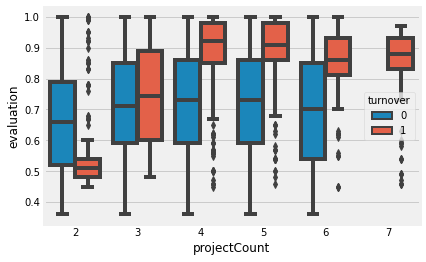

In [89]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

## 3l. Satisfaction VS Evaluation


**Summary:** This is by far the most compelling graph. This is what I found:

* There are **3** distinct clusters for employees who left the company

**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

* **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

* **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

* **Question:** Could this cluser mean that employees left because they found another job opportunity?

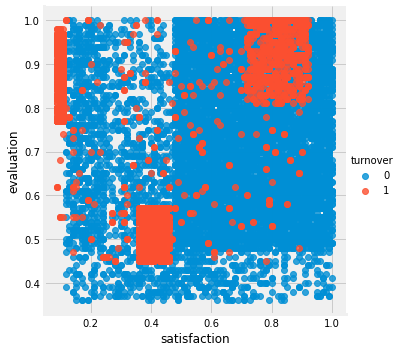

In [90]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

[Text(0, 0.5, 'Percent')]

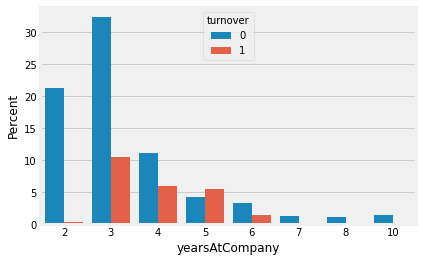

In [91]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## 3n. K-Means Clustering of Employee Turnover


**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee

**Cluster 3 (Green):** Hard-working and Happy Employee

**Clustering PROBLEM:**

- How do we know that there are "3" clusters?
- We would need expert domain knowledge to classify the right amount of clusters
- Hidden uknown structures could be present

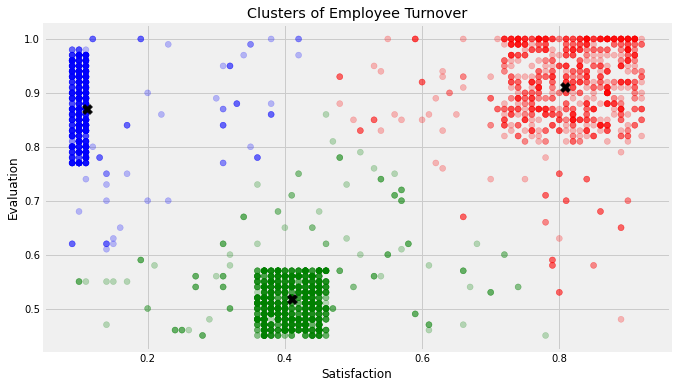

In [92]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

## Feature Importance

**Summary:**

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee satisfaction, yearsAtCompany, and evaluation. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

**Top 3 Features:**

1. Satisfaction
2. YearsAtCompany
3. Evaluation

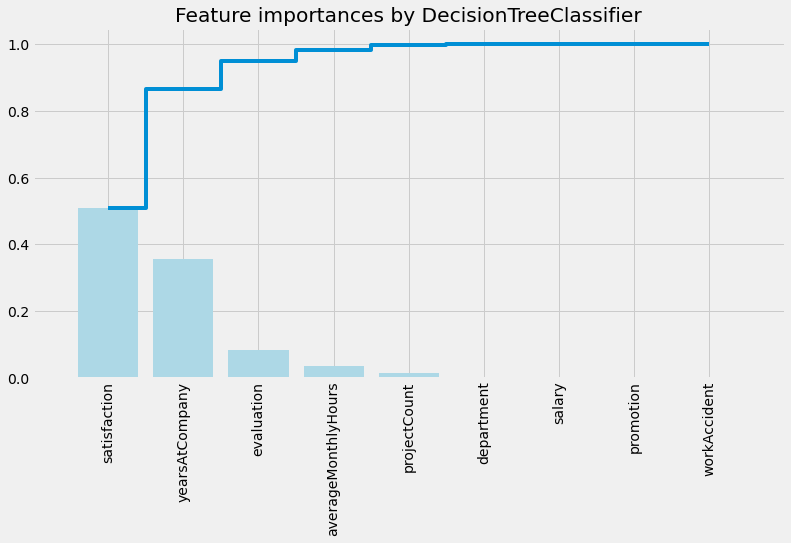

In [93]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()


## 4a. Modeling the Data: Logistic Regression Analysis

In [94]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
df = pd.read_csv("C:/Users/Asus/Downloads/Employee data.csv", index_col=None)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int', 'turnover']
df = df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()
#

,satisfaction,evaluation,yearsAtCompany,int
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


## Using Logistic Regression Coefficients


With the elimination of the other variables, I’ll be using the three most important features to create our model: Satisfaction, Evaluation, and YearsAtCompany.

Following overall equation was developed:

**Employee Turnover Score** = Satisfaction(**-3.769022**) + Evaluation(**0.207596**) + YearsAtCompany*(**0.170145**) + **0.181896**

In [95]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','yearsAtCompany', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

In [96]:
# Create function to compute coefficients
coef = answer.params
def calculate_retention(coef, Satisfaction, Evaluation, YearsAtCompany) : 
    y1 =  coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany
    p = np.exp(y1) / (1+np.exp(y1))
    return f'An Employee with {Satisfaction} Satisfaction and {Evaluation} Evaluation and worked for {YearsAtCompany} years has a {p*100:.2f}% chance of turnover.'




# Model Evaluation

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Assume X_train, X_test, y_train, y_test are your training and testing data 
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("ROC AUC Score:", roc_auc_score(y_test, predictions))
print("Log-Loss:", log_loss(y_test, predictions))

Confusion Matrix:
[[1581  133]
 [ 390  146]]

Accuracy: 0.7675555555555555
Precision: 0.5232974910394266
Recall: 0.27238805970149255
F1 Score: 0.3582822085889571
ROC AUC Score: 0.5973958968285759
Log-Loss: 8.028393955998446


## 5. Interpreting the Data

**Summary:** With all of this information, this is what Bob should know about his company and why his employees probably left:

1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
4. Employees with **low to medium salaries** are the bulk of employee turnover
5. Employees that had **2,6, or 7 project count** was at risk of leaving the company
6. Employee **satisfaction** is the highest indicator for employee turnover.
7. Employee that had **4 and 5 yearsAtCompany** should be taken into consideration for high turnover rate
8. Employee **satisfaction, yearsAtCompany,** and **evaluation** were the three biggest factors in determining turnover.